In [3]:
from interpret import interpret
from querry import *
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from DataSet import DataSet

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [11]:
# fix random seed for reproducibility
seed = 8888

# create a new DataSet object
dataset = DataSet()
dataset.get_data('../data/TE_survey_csv_repaired.csv')

dataset.clean()
dataset.drop(['Authors', 'DOI', 'Comments', 'Comments.1', 'Author of Unit Cell','Unit Cell DOI'])

# use extrapolate_400K to extrapolate more row data
dataset_2 = DataSet()
dataset_2.data = dataset.extrapolate_400K([])
dataset_2.get_info()

1450 rows and 4 columns.
Components are: 
Formula, Resist, Seebeck, T (K)


In [24]:
# make an array containing the atomic descriptors
array = [compound_short_descriptors(x) for x in dataset_2.df['Formula'].values]
ndf = pd.DataFrame.from_records(array)
ndf = ndf.join(dataset_2.df[['T (K)']])

In [25]:
# clean up the data (get rid of strings and NaNs.)
ndf.apply(pd.to_numeric)
ndf = ndf.fillna(0)
print(ndf.head())

      0     1             2       3      4       5       6     7     8      9  \
0  1.00  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.0  17.0  20.0  167.0   
1  1.00  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.0  17.0  20.0  167.0   
2  1.00  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.0  17.0  20.0  167.0   
3  1.00  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.0  17.0  20.0  167.0   
4  0.98  16.0  3.400000e-08  3810.0  200.0  1757.0  1115.0  17.0  20.0  167.0   

    ...     71   72   73   74   75   76   77   78   79   T (K)  
0   ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   300.0  
1   ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   400.0  
2   ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   700.0  
3   ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1000.0  
4   ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   300.0  

[5 rows x 81 columns]


In [26]:
X = ndf.values
Y = dataset_2.df[['Seebeck']].values

In [40]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.10,
                                                    random_state=seed)

# create the scaler from the training data only and keep it for later use
X_train_scaler = StandardScaler().fit(X_train_pn)
# apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train_pn)
# tranform the testing set
X_test = X_train_scaler.transform(X_test_pn)

# # create the scaler from the training data only and keep it for later use
# y_train_scaler = StandardScaler().fit(y_train_pn)
# # apply the scaler transform to the training data
# y_train = y_train_scaler.transform(y_train_pn)
# # tranform the testing set
# y_test = y_train_scaler.transform(y_test_pn)

In [44]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(81, input_dim=81, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, input_dim=100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, input_dim=100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [65]:
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs = 500, nb_epoch=1000, batch_size=100, verbose=2)

In [66]:
kfold = KFold(n_splits=2, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Epoch 1/500
 - 2s - loss: 37166.9485
Epoch 2/500
 - 0s - loss: 37159.7313
Epoch 3/500
 - 0s - loss: 37145.8558
Epoch 4/500
 - 0s - loss: 37108.5747
Epoch 5/500
 - 0s - loss: 37031.8384
Epoch 6/500
 - 0s - loss: 36855.1379
Epoch 7/500
 - 0s - loss: 36509.1409
Epoch 8/500
 - 0s - loss: 35893.2404
Epoch 9/500
 - 0s - loss: 34894.6845
Epoch 10/500
 - 0s - loss: 33425.1342
Epoch 11/500
 - 0s - loss: 31615.3738
Epoch 12/500
 - 0s - loss: 29864.4418
Epoch 13/500
 - 0s - loss: 28412.1710
Epoch 14/500
 - 0s - loss: 27127.3001
Epoch 15/500
 - 0s - loss: 25849.7044
Epoch 16/500
 - 0s - loss: 24475.2683
Epoch 17/500
 - 0s - loss: 22955.3412
Epoch 18/500
 - 0s - loss: 21383.9074
Epoch 19/500
 - 0s - loss: 19743.2838
Epoch 20/500
 - 0s - loss: 18188.6460
Epoch 21/500
 - 0s - loss: 16780.4399
Epoch 22/500
 - 0s - loss: 15570.4297
Epoch 23/500
 - 0s - loss: 14660.4352
Epoch 24/500
 - 0s - loss: 13997.5569
Epoch 25/500
 - 0s - loss: 13371.3917
Epoch 26/500
 - 0s - loss: 12818.8496
Epoch 27/500
 - 0s - 

NOICE!!

# Go Deeper

In [67]:
# define the model
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=81, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [68]:
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs = 500, nb_epoch=1000, batch_size=100, verbose=2)

In [70]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/500
 - 2s - loss: 37166.9658
Epoch 2/500
 - 0s - loss: 37159.7578
Epoch 3/500
 - 0s - loss: 37145.9471
Epoch 4/500
 - 0s - loss: 37108.7329
Epoch 5/500
 - 0s - loss: 37032.2263
Epoch 6/500
 - 0s - loss: 36856.1628
Epoch 7/500
 - 0s - loss: 36510.5035
Epoch 8/500
 - 0s - loss: 35894.7193
Epoch 9/500
 - 0s - loss: 34895.4481
Epoch 10/500
 - 0s - loss: 33423.3993
Epoch 11/500
 - 0s - loss: 31602.7936
Epoch 12/500
 - 0s - loss: 29845.5886
Epoch 13/500
 - 0s - loss: 28406.8548
Epoch 14/500
 - 0s - loss: 27143.8507
Epoch 15/500
 - 0s - loss: 25881.4545
Epoch 16/500
 - 0s - loss: 24510.4225
Epoch 17/500
 - 0s - loss: 23015.6118
Epoch 18/500
 - 0s - loss: 21451.7691
Epoch 19/500
 - 0s - loss: 19838.3266
Epoch 20/500
 - 0s - loss: 18302.2397
Epoch 21/500
 - 0s - loss: 16885.7802
Epoch 22/500
 - 0s - loss: 15685.9456
Epoch 23/500
 - 0s - loss: 14770.7709
Epoch 24/500
 - 0s - loss: 14153.4410
Epoch 25/500
 - 0s - loss: 13492.5769
Epoch 26/500
 - 0s - loss: 12974.4978
Epoch 27/500
 - 0s - 

Daaaang. That's pretty good!

# More Graphics

Epoch 1/20
 - 6s - loss: 30371.5365 - mean_squared_error: 30371.5365 - mean_absolute_error: 131.1682 - mean_absolute_percentage_error: 794.6267 - cosine_proximity: -4.2069e-01
Epoch 2/20
 - 1s - loss: 14843.4218 - mean_squared_error: 14843.4218 - mean_absolute_error: 86.5387 - mean_absolute_percentage_error: 6338.0261 - cosine_proximity: -8.0383e-01
Epoch 3/20
 - 1s - loss: 10328.9139 - mean_squared_error: 10328.9139 - mean_absolute_error: 70.8683 - mean_absolute_percentage_error: 7466.4466 - cosine_proximity: -8.5594e-01
Epoch 4/20
 - 1s - loss: 8254.6739 - mean_squared_error: 8254.6739 - mean_absolute_error: 61.4260 - mean_absolute_percentage_error: 8057.0944 - cosine_proximity: -8.7739e-01
Epoch 5/20
 - 1s - loss: 7092.5797 - mean_squared_error: 7092.5797 - mean_absolute_error: 56.2441 - mean_absolute_percentage_error: 7375.4251 - cosine_proximity: -8.8506e-01
Epoch 6/20
 - 1s - loss: 6147.0195 - mean_squared_error: 6147.0195 - mean_absolute_error: 52.0697 - mean_absolute_percentage

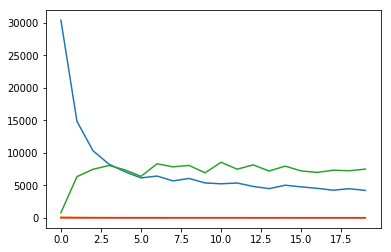

In [225]:
from matplotlib import pyplot

# create model
model = Sequential()
model.add(Dense(100, input_dim=81, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
# train model
history = model.fit(X_train, y_train, epochs=20, batch_size=len(X), verbose=2)
# plot metrics
pyplot.plot(history.history['mean_squared_error'])
pyplot.plot(history.history['mean_absolute_error'])
pyplot.plot(history.history['mean_absolute_percentage_error'])
pyplot.plot(history.history['cosine_proximity'])
pyplot.show()

In [226]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [227]:
from keras import backend
 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

Epoch 1/20
 - 5s - loss: 36262.8178 - rmse: 150.6964
Epoch 2/20
 - 0s - loss: 20246.1290 - rmse: 105.3321
Epoch 3/20
 - 0s - loss: 7911.3507 - rmse: 62.0191
Epoch 4/20
 - 0s - loss: 5336.9256 - rmse: 51.5170
Epoch 5/20
 - 0s - loss: 4448.6374 - rmse: 44.4875
Epoch 6/20
 - 0s - loss: 3786.2708 - rmse: 40.8030
Epoch 7/20
 - 0s - loss: 3656.7692 - rmse: 39.7955
Epoch 8/20
 - 0s - loss: 3665.0451 - rmse: 40.3875
Epoch 9/20
 - 0s - loss: 3327.7626 - rmse: 38.3240
Epoch 10/20
 - 0s - loss: 3364.5734 - rmse: 39.0086
Epoch 11/20
 - 0s - loss: 3514.7310 - rmse: 39.0620
Epoch 12/20
 - 0s - loss: 3350.4053 - rmse: 38.8331
Epoch 13/20
 - 0s - loss: 3295.6972 - rmse: 38.4133
Epoch 14/20
 - 0s - loss: 4693.6953 - rmse: 48.0497
Epoch 15/20
 - 0s - loss: 3738.9738 - rmse: 42.4420
Epoch 16/20
 - 0s - loss: 3620.5658 - rmse: 41.3975
Epoch 17/20
 - 0s - loss: 3242.7619 - rmse: 38.5775
Epoch 18/20
 - 0s - loss: 2939.1181 - rmse: 36.0491
Epoch 19/20
 - 0s - loss: 2930.6542 - rmse: 36.0509
Epoch 20/20
 - 0s

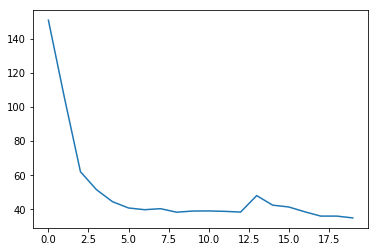

In [229]:
# create model
model.add(Dense(100, input_dim=81, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mse', optimizer='adam', metrics=[rmse])
# train model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=2)
# plot metrics
pyplot.plot(history.history['rmse'])
pyplot.show()

That is the RMSE metric.

In [230]:
np.concatenate((model.predict(X_test), y_test), axis=1)
#visual inspection on the testing sets.

array([[-247.23245239, -281.75      ],
       [-275.23764038, -358.019     ],
       [ 355.14794922,  325.374     ],
       [ -37.9923172 ,  -49.65      ],
       [-177.11784363, -228.446     ],
       [ 148.00857544,  151.36      ],
       [  11.93872833,   27.2882    ],
       [ -66.20591736, -124.72      ],
       [ 355.27996826,  403.782     ],
       [-102.37460327,  -81.62      ],
       [-132.33992004, -177.319     ],
       [ 224.42033386,  153.6       ],
       [ 313.57357788,  321.429     ],
       [  52.51895142,   12.43      ],
       [ -88.18269348,  -35.67      ],
       [ 100.71368408,  142.661     ],
       [-114.07516479, -103.74      ],
       [ 111.92514801,  149.997     ],
       [ 224.1661377 ,  239.        ],
       [-191.79322815, -287.        ],
       [ -57.53479767,  -72.01      ],
       [  20.84288597,   19.3       ],
       [ -87.09172058, -119.99      ],
       [  46.86347198, -174.        ],
       [ -65.86012268, -147.        ],
       [ -66.90156555,  -

In [231]:
# just for testing, at the end.
def test_data(compound, T):
    """Converts one sample to raw data for predicting thru ANN"""
    array = np.zeros(80) # create an empty array with zeros
    descriptors = np.array(compound_short_descriptors(compound)) # load descriptors 
    for index, x in np.ndenumerate(descriptors):
        array[index] = x
    ndf = pd.DataFrame(data=array)
    # clean up the data (get rid of strings and NaNs.)
    ndf.apply(pd.to_numeric)
    ndf = ndf.fillna(0)
    ndf = ndf.append([T])
    array = X_train_scaler.fit_transform(ndf)
    array = array.T
    return array

def predict(compound, T):
    print(str(model.predict(test_data(compound, T))[0][0]) + '  (uV/K)')

In [232]:
predict('Ca0.98La0.02MnO3', 300)

-81.792854  (uV/K)


In [233]:
predict('CaMnO3', 500)

-112.13112  (uV/K)


In [252]:
predict('FeSb2Ge0.1Te0.9', 500)

19.758158  (uV/K)


In [246]:
predict('MnMnMn', 600)
predict('MnMn', 600)
predict('Mn', 600)

124.779236  (uV/K)
124.779236  (uV/K)
124.779236  (uV/K)


In [257]:
predict('MnTe', 400)
predict('MnTeMnTe', 400)
predict('CaMnTe', 400)

-8.65456  (uV/K)
-8.65456  (uV/K)
-91.34164  (uV/K)


Pretty smart!

COOL!
Gotta go to sleep. See you next time.